In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'DejaVu Sans', 'serif': ['Computer Modern'], 'size':15})
rc('figure', facecolor='w')
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits, ascii
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
from collections import OrderedDict
from scipy.interpolate import UnivariateSpline
import os, math
from natsort import natsorted as nsort

import TheCannon
from TheCannon import apogee, dataset, model
import apogee_tools as ap
AP_PATH = os.environ['APOGEE_DATA']

/home/jess/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
mann = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/raw_data_files/mann_87_APOGEE_x_Gaia.csv.gz')
mann['BP_RP'] = mann['phot_bp_mean_mag'] - mann['phot_rp_mean_mag']
mann['J_K'] = mann['J'] - mann['K']
mann['G_ABS'] = mann['phot_g_mean_mag'] + 5*np.log10(mann['parallax'])-10
mann['K_ABS'] = mann['K'] + 5*np.log10(mann['parallax'])-10
mann['DIST'] = 1/np.array(mann['parallax'])

mann_results = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/train_mann/results/test_results.csv.gz')

In [182]:
test = pd.read_csv('test_results/test_mann.csv')
test['K_ABS'] = test['K'] + 5*np.log10(test['PLX'])-10
test['J_K'] = test['J'] - test['K']
# test = test[test['CHI'] < 200000]

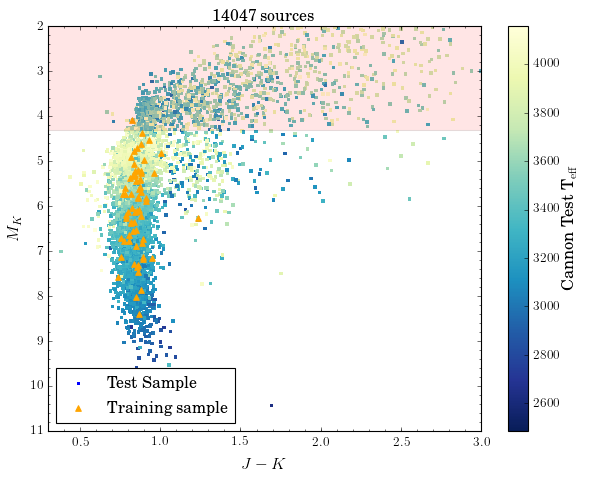

In [175]:
pl = plt.scatter(test['J_K'], test['K_ABS'], c=test['TEFF'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test Sample')
plt.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)

plt.fill([.3,3,3,.3], [2,2,4.3,4.3], 'r', alpha=.1)
# plt.fill([1.1,3,3,1.1], [4,4,11,11], 'k', alpha=.1)

cb = plt.colorbar(pl)
cb.set_label(r'Cannon Test T$_{\rm eff}$', fontsize=15)
plt.xlabel(r'$J-K$', fontsize=15)
plt.ylabel(r'$M_{K}$', fontsize=15)
# plt.ylim(17,7.5)
# plt.xlim(1,6)
plt.legend(loc='lower left', scatterpoints=1)
plt.minorticks_on()
plt.tight_layout()
plt.ylim(11,2)
plt.xlim(.3,3)
plt.title(str(len(test['BP_RP']))+' sources')
plt.show()

#=============

# pl = plt.scatter(test['J_K'], test['K_ABS'], c=test['FE_H'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
#                  label='Test Sample')
# plt.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)
# cb = plt.colorbar(pl)
# cb.set_label(r'Cannon Test [Fe/H]', fontsize=15)
# plt.xlabel(r'$J-K$', fontsize=15)
# plt.ylabel(r'$M_{K}$', fontsize=15)
# plt.legend(loc='lower left', scatterpoints=1)
# plt.minorticks_on()
# plt.tight_layout()
# plt.ylim(11,2)
# plt.xlim(.3,3)
# plt.show()

# #=============

# # fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[16,4])
# pl = plt.scatter(test['J_K'], test['K_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
#                  label='Test Sample')
# plt.scatter(mann['J_K'], mann['K_ABS'], color='orange', marker='^', label='Training sample', s=25)
# cb = plt.colorbar(pl)
# cb.set_label(r'Cannon Model $\chi^2$ fit', fontsize=15)
# plt.xlabel(r'$J-K$', fontsize=15)
# plt.ylabel(r'$M_{K}$', fontsize=15)
# plt.legend(loc='lower left', scatterpoints=1)
# plt.minorticks_on()
# plt.tight_layout()
# plt.ylim(11,2)
# plt.xlim(.3,3)
# plt.show()

14047


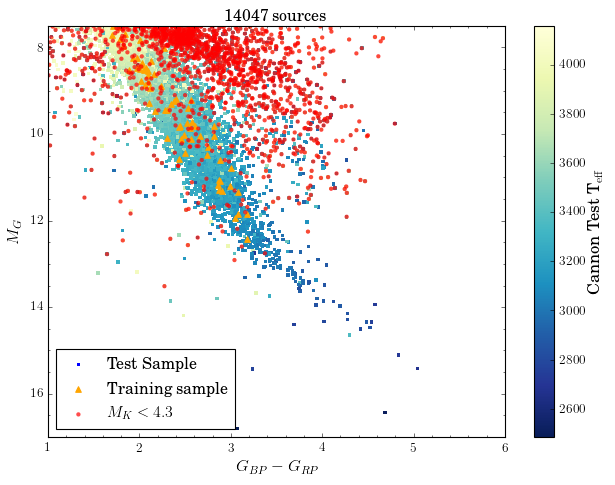

In [178]:
print(len(test['BP_RP']))

pl = plt.scatter(test['BP_RP'], test['G_ABS'], c=test['TEFF'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test Sample')
plt.scatter(mann_bp_rp, mann_g_abs, color='orange', marker='^', label='Training sample', s=25)

# plt.scatter(test[test['J_K'] > 1.1]['BP_RP'], test[test['J_K'] > 1.1]['G_ABS'], color='grey', edgecolor='none', \
#             label=r'$J-K>1.1$', s=15, alpha=.7)
plt.scatter(test[test['K_ABS'] < 4.3]['BP_RP'], test[test['K_ABS'] < 4.3]['G_ABS'], color='r', edgecolor='none', \
            label=r'$M_K<4.3$', s=15, alpha=.7)

cb = plt.colorbar(pl)
cb.set_label(r'Cannon Test T$_{\rm eff}$', fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(17,7.5)
plt.xlim(1,6)
plt.legend(loc='lower left', scatterpoints=1)
plt.minorticks_on()
plt.tight_layout()
plt.title(str(len(test['BP_RP']))+' sources')
plt.show()

In [179]:
# test = test[test['J_K'] < 1.1]
test = test[test['K_ABS'] > 4.3]

12604


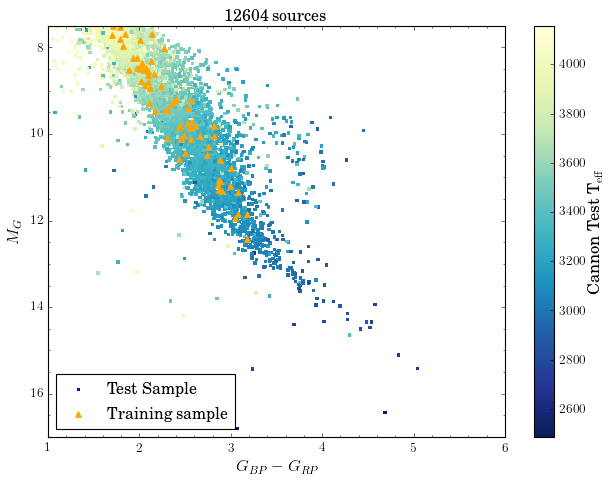

In [180]:
print(len(test['BP_RP']))

pl = plt.scatter(test['BP_RP'], test['G_ABS'], c=test['TEFF'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test Sample')
plt.scatter(mann_bp_rp, mann_g_abs, color='orange', marker='^', label='Training sample', s=25)

cb = plt.colorbar(pl)
cb.set_label(r'Cannon Test T$_{\rm eff}$', fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(17,7.5)
plt.xlim(1,6)
plt.legend(loc='lower left', scatterpoints=1)
plt.minorticks_on()
plt.tight_layout()
plt.title(str(len(test['BP_RP']))+' sources')
plt.show()

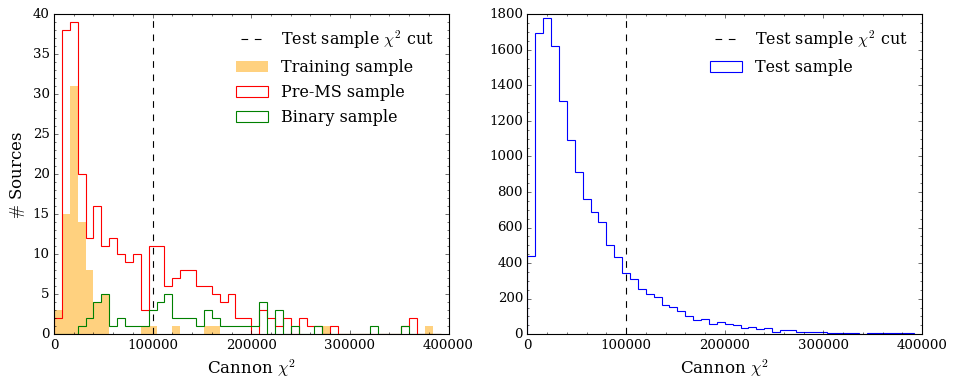

In [213]:
elbadry_cat = pd.read_csv('/home/jess/Desktop/Research/surveys/catalogs/APOGEE_ElBadry_binaries.csv')
elbadry_ID = elbadry_cat['APOGEE_ID']
skinner_ID = ['2M00372323+4950469','2M03122509+0021585','2M03330508+5101297','2M03393700+4531160',\
              '2M04281703+5521194','2M04373881+4650216','2M04595013+3638144','2M05421216+2224407',\
              '2M05504191+3525569','2M06115599+3325505','2M06125378+2343533','2M06213904+3231006',\
              '2M06561894-0835461','2M07063543+0219287','2M07444028+7946423','2M08100405+3220142',\
              '2M08351992+1408333','2M10331367+3409120','2M10423925+1944404','2M10464238+1626144',\
              '2M10520326+0032383','2M11081979+4751217','2M12045611+1728119','2M12193796+2634445',\
              '2M12214070+2707510','2M12260547+2644385','2M12260848+2439315','2M14545496+4108480',\
              '2M14551346+4128494','2M14562809+1648342','2M15183842-0008235','2M15192613+0153284',\
              '2M15225888+3644292','2M17204248+4205070','2M18514864+1415069','2M19081153+2839105',\
              '2M19235494+3834587','2M19433790+3225124','2M19560585+2205242','2M20474087+3343054',\
              '2M21005978+5103147','2M21234344+4419277','2M21442066+4211363','2M21451241+4225454']

pms_cat = fits.open('/home/jess/Desktop/Research/surveys/catalogs/APOGEE_PMS_catalog.fits')
pms_ID = np.array(pms_cat[1].data['2MASS'])
bin_ID = list(set(elbadry_ID) or set(skinner_ID))

pms_ind = []
for i in range(len(pms_ID)):
    if pms_ID[i] in list(test['ID']):
        ind = np.where(test['ID'] == pms_ID[i])[0][0]
        pms_ind.append(ind)
        
bin_ind = []
for i in range(len(bin_ID)):
    if bin_ID[i] in list(test['ID']):
        ind = np.where(test['ID'] == bin_ID[i])[0][0]
        bin_ind.append(ind)

bins = range(0, 400000, 8000)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[14,5])
ax1.hist(mann_results['CHI_SQ'], color='orange', label=r'Training sample', edgecolor='none', alpha=.5, bins=bins)
ax1.hist(test['CHI'][pms_ind][~np.isnan(test['CHI'][pms_ind])], color='r', label=r'Pre-MS sample', bins=bins, histtype='step')
ax1.hist(test['CHI'][bin_ind][~np.isnan(test['CHI'][bin_ind])], color='g', label=r'Binary sample', bins=bins, histtype='step')
ax1.axvline(x=100000, linestyle='--', color='k', label=r'Test sample $\chi^2$ cut')
# handles, labels = ax1.get_legend_handles_labels()
# handles = [handles[1], handles[2], handles[3], handles[0]]
# labels = [labels[1], labels[2], labels[3], labels[0]]

ax2.hist(test['CHI'], label='Test sample', bins=bins, histtype='step')
ax2.axvline(x=100000, linestyle='--', color='k', label=r'Test sample $\chi^2$ cut')
           
ax1.set_xticks([0,100000,200000,300000,400000])
ax2.set_xticks([0,100000,200000,300000,400000])
ax1.set_xlabel(r'Cannon $\chi^2$', fontsize=15)
ax2.set_xlabel(r'Cannon $\chi^2$', fontsize=15)
ax1.set_ylabel(r'$\#$ Sources', fontsize=15)
ax1.legend(loc='upper right', frameon=False)
ax2.legend(loc='upper right', frameon=False)
ax2.legend(loc='upper right', frameon=False)
ax1.minorticks_on()
ax2.minorticks_on()
plt.show()

In [206]:
handles2[0]

In [167]:
cut = test
for ID in list(set(bin_ID) or set(pms_ID)):
    cut = cut[cut['ID'] != ID]

12873


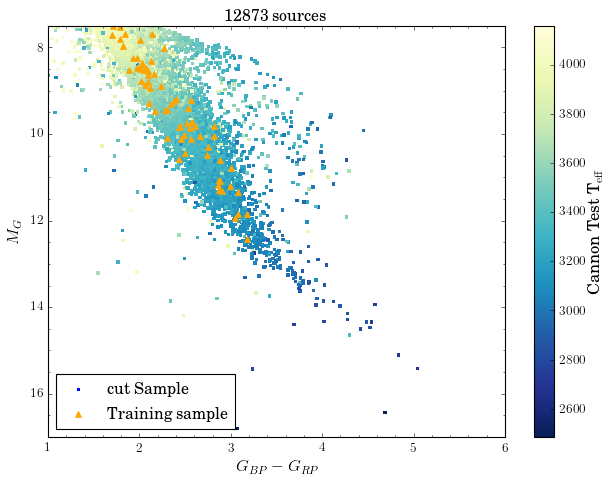

In [170]:
print(len(cut['BP_RP']))

pl = plt.scatter(cut['BP_RP'], cut['G_ABS'], c=cut['TEFF'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='cut Sample')
plt.scatter(mann_bp_rp, mann_g_abs, color='orange', marker='^', label='Training sample', s=25)

cb = plt.colorbar(pl)
cb.set_label(r'Cannon Test T$_{\rm eff}$', fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(17,7.5)
plt.xlim(1,6)
plt.legend(loc='lower left', scatterpoints=1)
plt.minorticks_on()
plt.tight_layout()
plt.title(str(len(cut['BP_RP']))+' sources')
plt.show()